## Pytorch part I

### Basic

In [1]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

torch.randn((1))

In [51]:
x = torch.ones(2,2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [52]:
y = x+2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [53]:
z = y * y * 3
z

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)

In [54]:
o = z.mean()
o

tensor(27., grad_fn=<MeanBackward0>)

In [55]:
o.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [56]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

In [57]:
x

tensor(1., requires_grad=True)

In [59]:
y = w*x+b
y

tensor(5., grad_fn=<AddBackward0>)

In [60]:
b.grad

## Pytorch part II

### Neural Networks

#### 1. Fully connected

In [62]:
x=torch.randn(10,3)
y = torch.randn(10,2)

In [63]:
linear = nn.Linear(3,2)
print('w:',linear.weight)
print('b:',linear.bias)

w: Parameter containing:
tensor([[-0.4877, -0.2882, -0.2791],
        [-0.5447, -0.5483,  0.4855]], requires_grad=True)
b: Parameter containing:
tensor([-0.4625, -0.4300], requires_grad=True)


In [67]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [68]:
pred = linear(x) #forward pass

In [72]:
pred

tensor([[-0.4671, -0.2666],
        [-1.1870, -1.0198],
        [-1.0252,  0.1863],
        [ 0.2153, -1.1970],
        [-0.2030, -0.3729],
        [-0.3743, -0.6702],
        [-0.4604, -0.3227],
        [-0.5018, -0.5068],
        [-0.8665,  0.1135],
        [-0.9030, -0.8061]], grad_fn=<AddmmBackward>)

In [69]:
loss = criterion(pred, y)
print("loss: ", loss.item())

loss:  1.123942494392395


In [70]:
loss.backward() #back-propagate to calculate the derivatives

In [73]:
print("dL/dw: ", linear.weight.grad)
print("dL/db", linear.bias.grad)

dL/dw:  tensor([[-0.0086, -0.3099, -0.1877],
        [ 0.2965, -0.4891, -0.0638]])
dL/db tensor([-0.9602, -0.7352])


In [74]:
optimizer.step()

In [76]:
pred = linear(x)
loss = criterion(pred, y)
print('The loss after 1 step optimization: ', loss.item())

The loss after 1 step optimization:  1.1048038005828857


#### 2. Linear Regression

In [89]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [90]:
model = nn.Linear(input_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [91]:
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    #forward
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print(f"Epoch {epoch+1}/{num_epochs} => Loss = {loss.item()}")

Epoch 5/60 => Loss = 5.202657699584961
Epoch 10/60 => Loss = 2.27740478515625
Epoch 15/60 => Loss = 1.0921601057052612
Epoch 20/60 => Loss = 0.6118209958076477
Epoch 25/60 => Loss = 0.4170512855052948
Epoch 30/60 => Loss = 0.33797070384025574
Epoch 35/60 => Loss = 0.3057580590248108
Epoch 40/60 => Loss = 0.29253292083740234
Epoch 45/60 => Loss = 0.28700029850006104
Epoch 50/60 => Loss = 0.28458452224731445
Epoch 55/60 => Loss = 0.2834317982196808
Epoch 60/60 => Loss = 0.28279125690460205


In [93]:
predicted=model(torch.from_numpy(x_train)).detach().numpy()

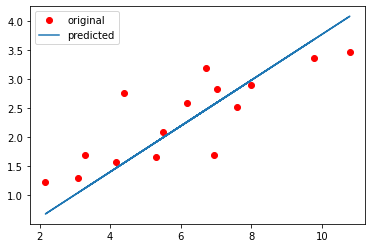

In [94]:
plt.plot(x_train, y_train, "ro", label="original")
plt.plot(x_train, predicted, label="predicted")
plt.legend()
plt.show()

#### 3. Classification

In [78]:
# Hyper-parameters
input_size = 28 * 28    # 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Extracting ../../data\MNIST\raw\train-images-idx3-ubyte.gz to ../../data\MNIST\raw


Extracting ../../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../../data\MNIST\raw



Extracting ../../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../../data\MNIST\raw


Extracting ../../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../../data\MNIST\raw
Processing...


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!
